## DHTML
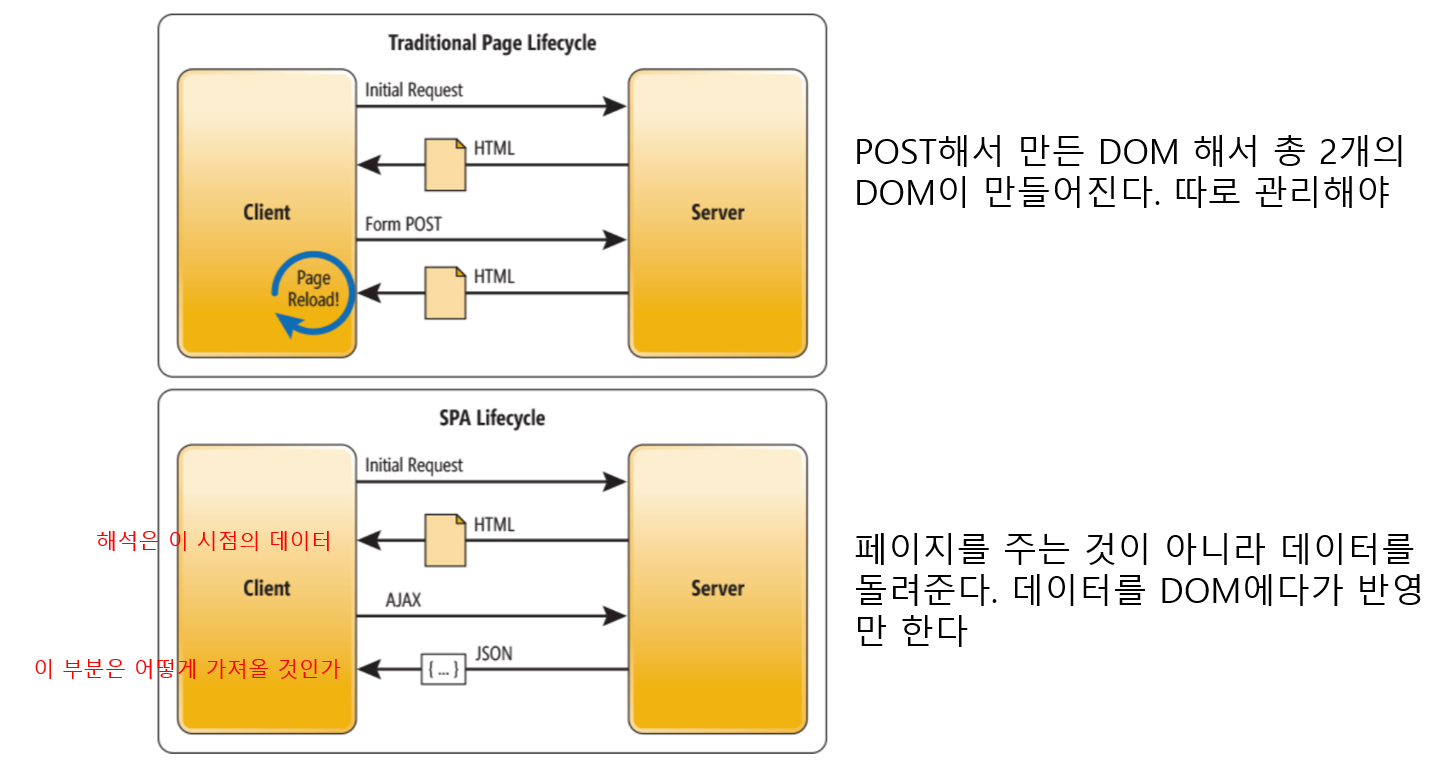

In [1]:
# download 정의
def download(method,url,param=None, data=None, timeout=1,maxretries=3):
#원래 header도 있어야된다. 위에 정의한거 쓸꺼야  
    try:
        resp=requests.request(method, url, params=param, data=data, headers=headers)
        resp.raise_for_status()#강제로 에러를 내는 코드
    except requests.exceptions.HTTPError as e:
        if 500<= e.response.status_code<600 and maxretries>0:
            time.sleep(timeout)
            print("재시도")
            resp=download(method,url,param,data,timeout,maxretries-1)
        else:
            print(e.response.status_code)
            print(e.response.reason)
    return resp

In [2]:
!pip install bs4
from bs4 import BeautifulSoup
import urllib
import json
import requests
import re

In [13]:
import time

### 있어야 할 부분이 비어있는 경우
#### (1) result 부분이 비어있다 => home을 찾아야 => home도 없다
### => 셀레니움

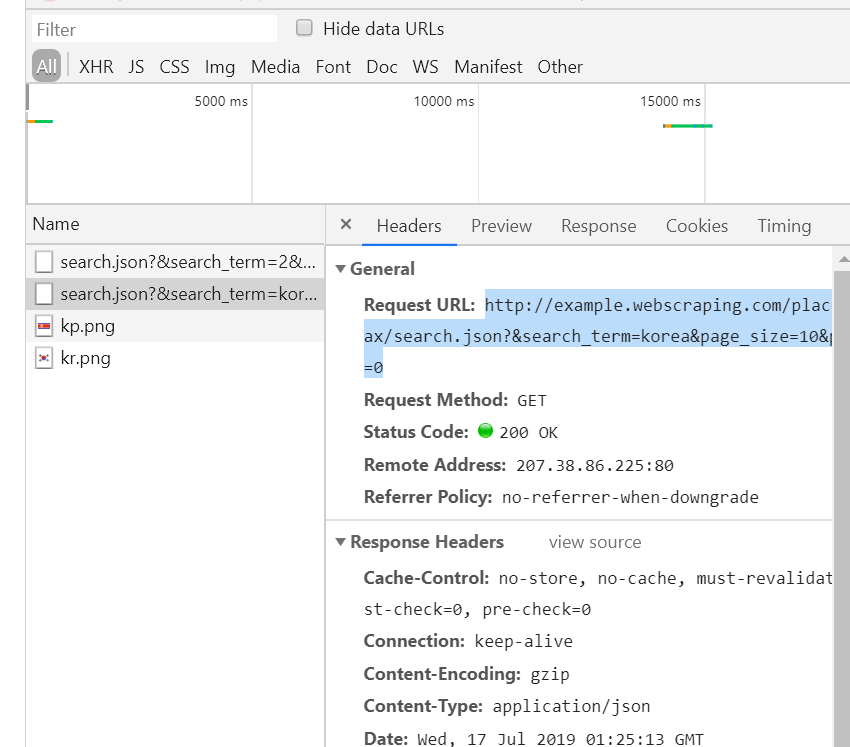
**검색 후의 값을 찾는다**

In [14]:
# http://example.webscraping.com/places/ajax/search.json?&search_term=korea&page_size=10&page=0


In [16]:
# json 값 찾는다
# {"records": [{"pretty_link": "<div><a href=\"/places/default/view/North-Korea-165\"><img src=\"/places/static/images/flags/kp.png\" /> North Korea</a></div>", "country": "North Korea", "id": 4552797}, {"pretty_link": "<div><a href=\"/places/default/view/South-Korea-211\"><img src=\"/places/static/images/flags/kr.png\" /> South Korea</a></div>", "country": "South Korea", "id": 4552843}], "num_pages": 1, "error": ""}

In [21]:
url = 'http://example.webscraping.com/places/ajax/search.json'
param = {
    'search_term' :'korea',
    'page_size':10,
    'page' :0
    
}
html = download("get",url, param)

In [22]:
for _ in html.json()["records"]:
    print(_["country"])

North Korea
South Korea


# Selenium

- Selenium은 주로 웹앱을 테스트하는데 이용하는 프레임워크다. webdriver라는 API를 통해 운영체제에 설치된 Chrome등의 브라우저를 제어하게 된다.
- 자바스크립트 해석을 도와준다. Ajax 같은 애들 해석 가능
- 동적으로 변하는 DOM을 가지고 올 수 있게 도와준다

Selenium automates browsers

Automating web applications for testing purposes

Rapid feedback to developers

Finding defects missed by manual testing

Support for Agile and extreme development methodologies

In [23]:
!pip install selenium
from selenium import webdriver

In [328]:
driver = webdriver.Chrome()

In [27]:
driver.close()

In [28]:
driver

<selenium.webdriver.chrome.webdriver.WebDriver (session="9b56dd492b18d991634f2949b9bc7b02")>

In [66]:
driver.get("http://example.webscraping.com/places/default/search")

In [67]:
driver.page_source

'<html class=" js flexbox flexboxlegacy canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers no-applicationcache svg inlinesvg smil svgclippaths" lang="en-us" style=""><!--<![endif]--><head>\n<title>Example web scraping website</title>\n  <!--[if !HTML5]>\n      <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n  <![endif]-->\n  <!-- www.phpied.com/conditional-comments-block-downloads/ -->\n  <!-- Always force latest IE rendering engine\n       (even in intranet) & Chrome Frame\n       Remove this if you use the .htaccess -->\n\t   \n  <meta charset="utf-8">\n\n  <!-- http://dev.w3.org/html5/markup/meta.name.html -->\n  <meta name="applicati

In [68]:
inputTag = driver.find_element_by_id("search_term") 

In [69]:
inputTag.send_keys("korea")

In [72]:
driver.find_element_by_xpath("//input[@type='submit']").click()

In [73]:
from bs4 import BeautifulSoup
dom = BeautifulSoup(driver.page_source, "lxml")
dom.select("#results")

[<div id="results"><table><tbody><tr><td><div><a href="/places/default/view/North-Korea-165"><img src="/places/static/images/flags/kp.png"/> North Korea</a></div></td><td><div><a href="/places/default/view/South-Korea-211"><img src="/places/static/images/flags/kr.png"/> South Korea</a></div></td></tr></tbody></table></div>]

In [74]:
driver.find_element_by_css_selector("#results").text

'North Korea\nSouth Korea'

# 네이버 로그인

In [35]:
%%writefile account.json 

{
    "id":"kgh6784",
    "pw":"^kgh859093^"
}

Overwriting account.json


In [38]:
# id와 패스워드
#json object 만들거다

In [75]:
import json

with open("account.json") as fp:
    account = json.load(fp)

In [297]:
driver.get("https://www.naver.com")

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=75.0.3770.142)


In [40]:
# 코드를 가지고 창을 제어할 수 있다

In [77]:
driver.page_source

'<html lang="ko"><head>\n<meta charset="utf-8">\n<meta name="Referrer" content="origin">\n<meta http-equiv="Content-Script-Type" content="text/javascript">\n<meta http-equiv="Content-Style-Type" content="text/css">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=1100">\n<meta name="apple-mobile-web-app-title" content="NAVER">\n<meta name="robots" content="index,nofollow">\n<meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요">\n<meta property="og:title" content="네이버">\n<meta property="og:url" content="https://www.naver.com/">\n<meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png">\n<meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요">\n<meta name="twitter:card" content="summary">\n<meta name="twitter:title" content="">\n<meta name="twitter:url" content="https://www.naver.com/">\n<meta name="twitter:image" content="https://s.pstatic.net/static/www

In [92]:
driver.get("https://nid.naver.com/nidlogin.login?mode=form&url=https%3A%2F%2F")
driver.find_element_by_name("id").send_keys(account["id"])
driver.find_element_by_id("pw").send_keys(account["pw"])
driver.find_element_by_xpath("//input[@class='btn_global']")

<selenium.webdriver.remote.webelement.WebElement (session="6bde599bd789e38ccf1d1e405e52010c", element="828d013b-100c-45ec-bf50-9a8bae6e09d8")>

In [91]:
driver.find_element_by_xpath("//input[@class='btn_global']").click()

In [93]:
# 화면이 로그인 후 창으로 가지는 않지만 한 번 새로고침 되면 로그인된것이다

In [94]:
driver.get("https://mail.naver.com/")

In [95]:
driver.page_source

'<html lang="ko"><head>\n\t<meta http-equiv="X-UA-Compatible" content="IE=edge">\n\t<meta http-equiv="Content-Type" content="text/html; charset=UTF-8">\n\t\n\t\t\n\t\t\n\t\t\t\n\t\t\t\t\n\t\t\t\t\t<link rel="stylesheet" type="text/css" href="/css/mail2_le.min.190611.css">\n\t\t\t\t\t<link rel="stylesheet" type="text/css" href="/css/mail_skin.min.190611.css">\n\t\t\t\t\n\t\t\t\t\n\t\t\t\n\t\t\n\t\n\n\t\n\t\t\n\t\t\t\n\t\t\t\t\n\t\t\t\t\n\t\t\t\t\t<link rel="dns-prefetch" href="//ssl.pstatic.net">\n\t\t\t\t\t<link rel="dns-prefetch" href="//lcs.naver.com">\n\t\t\t\t\t<link rel="dns-prefetch" href="//cc.naver.com">\n\t\t\t\t\t<link rel="dns-prefetch" href="//static.nid.naver.com">\n\t\t\t\t\t<link rel="dns-prefetch" href="//phinf.pstatic.net">\n\t\t\t\t\t<link rel="stylesheet" type="text/css" href="/css/mail_me.min.190611.css">\n\t\t\t\t\n\t\t\t\n\t\t\t<link rel="shortcut icon" href="/favicon.ico?2">\n\t\t\t\n\t\t\n\n\t\t\n\t\n\n\t\n\t\t\n\t\n\t<title>받은메일함(2291) : 네이버 메일</title>\n\t<scri

In [100]:
for _ in driver.find_elements_by_css_selector("strong.mail_title"):
    print("[css]",_.text)
for _ in driver.find_elements_by_xpath("//div[@class='mTitle']//span/strong"):
    print("[xpath]" , _.text)

[css] 새로운 환경에서 로그인 되었습니다.
[css] (광고) 자나 깨나, 그대를 즐겁게 할 공연 생각!
[css] (광고) 내 의료실비 보험료 7월에 가입하면 얼마일까? 즉시확인!
[css] (광고) 7월에 갈만한 곳, 29CM 컬처캘린더
[css] (광고) 8/6일 Lenovo Transform 3.0에서 세계 최고 로봇공학자 데니스 홍을 만나보세요.
[css] (광고) kgh6784@naver.com님이 차 바꾸고 싶을때!!! 보증금 ZERO 신차 장기렌트가 무료견적 받아보세요~
[css] [🐍PyTricks]: @classmethod vs @staticmethod vs "plain" methods
[css] (광고) 전자노트 12인치 2+1증정, 최저가 / 모나미 153 만년필+펜파우치 SET 2만원 최저가 / 손안대고 발닦는 풋브러쉬 9,800원
[css] (광고) 웬뉴 #001 | 다시 찾아온 토종 마케팅?
[css] (광고) 명품 직구 슈퍼위크, 감정 서비스 런칭!
[css] [한국경제신문 오늘의 뉴스] ‘强대强’ 치닫는 韓·日…기업들은 속 탄다 外
[css] (광고) 유전자검사 검사비 무료 + 보험보장 설계 혜택 받으세요! ▶ 즉시신청
[css] We found a paper that you might be interested in.
[css] 인생의 복기
[css] (광고) ★어메이징10days★ 최대10% 카드할인+10만점+5% 적립
[xpath] 새로운 환경에서 로그인 되었습니다.
[xpath] (광고) 자나 깨나, 그대를 즐겁게 할 공연 생각!
[xpath] (광고) 내 의료실비 보험료 7월에 가입하면 얼마일까? 즉시확인!
[xpath] (광고) 7월에 갈만한 곳, 29CM 컬처캘린더
[xpath] (광고) 8/6일 Lenovo Transform 3.0에서 세계 최고 로봇공학자 데니스 홍을 만나보세요.
[xpath] (광고) kgh6784@naver.com님이 차 바꾸고 싶을때!!! 보증금 ZERO 신차 장기렌트가 무료견적 받아보세요~

In [111]:
driver.find_elements_by_css_selector("item_Wrap.bu6").click()

AttributeError: 'list' object has no attribute 'click'

In [103]:
driver.get_cookies()

[{'domain': 'naver.com',
  'httpOnly': False,
  'name': 'NIPD',
  'path': '/',
  'secure': False,
  'value': '1'},
 {'domain': 'naver.com',
  'expiry': 2524640400.153496,
  'httpOnly': False,
  'name': 'NNB',
  'path': '/',
  'secure': False,
  'value': '5ZVTGIQ4QYXF2'},
 {'domain': 'naver.com',
  'httpOnly': False,
  'name': 'NID_JKL',
  'path': '/',
  'secure': True,
  'value': 'iDMUa3oA6oM1AYLGnY2jGRZ4MbBKYXAD6IpR5XbMXz0='},
 {'domain': 'naver.com',
  'httpOnly': False,
  'name': 'nid_inf',
  'path': '/',
  'secure': False,
  'value': '1426799587'},
 {'domain': 'mail.naver.com',
  'httpOnly': False,
  'name': 'NMUSER',
  'path': '/',
  'secure': False,
  'value': 'udblKqEwaqbsFxMdFq2r1r+cFob/FAnwFxMqKqKmFqg9aqEwKogsKAnsadEsHou9a9vsxonOaxRVadUstoRVaqRVaqns1rejL9Us6xRVaqnD16lvpB2RFLl5WLl5MBp0bSloWrdnaAvmKARGW430DVd97BF0Mre5pzJZDLl5WLl5MBp0bSloWrdnaAvmKAn='},
 {'domain': 'naver.com',
  'httpOnly': False,
  'name': 'NID_SES',
  'path': '/',
  'secure': False,
  'value': 'AAABprwPxbHJQuB

In [105]:
# 세션을 만들자

In [106]:
import requests

session = requests.session()

In [109]:
session.cookies.set() # 여기에 name과 value를 전달해줄 수 있다

TypeError: set() missing 2 required positional arguments: 'name' and 'value'

In [104]:
for cookie in driver.get_cookies():
    print(cookie["name"], cookie["value"])

NIPD 1
NNB 5ZVTGIQ4QYXF2
NID_JKL iDMUa3oA6oM1AYLGnY2jGRZ4MbBKYXAD6IpR5XbMXz0=
nid_inf 1426799587
NMUSER udblKqEwaqbsFxMdFq2r1r+cFob/FAnwFxMqKqKmFqg9aqEwKogsKAnsadEsHou9a9vsxonOaxRVadUstoRVaqRVaqns1rejL9Us6xRVaqnD16lvpB2RFLl5WLl5MBp0bSloWrdnaAvmKARGW430DVd97BF0Mre5pzJZDLl5WLl5MBp0bSloWrdnaAvmKAn=
NID_SES AAABprwPxbHJQuBFTq+ImJO0PyOqYEOUzJcZRxinLyx7e3A0sEQNqXOLEw20hefiCzlc/xkJAjocDlebdjGy9oWT/CTVNKOa9XvlQiUCndIbNflbi/X+T3cEE5zHU+myMwNWy5+fiyNSydhSbmiw40UQHKry2Hp8ENkNhj6UD1XOXEkOfhVYe9l2yATBlj0x+z7yXCSyWOoNu2/t+uy7QGAIlOzNy22AiGSV1cfz8FRTODxNTXIZJc5qEo7lYdRz5GkvO7fjdc2IZow6YqEhyKzsdF5qqn0v9qxZm946MwT8qyjg56MeXhkkqAtM3JS/RcaqXUp3i/8loE2lV9KAC16w5t54oWZAS34WaVMHfbebhn5hdaOi6zhHQoCbp8zYaoxoyqkwVDrbQ3PwKo/TxRCSsMDWLsZ7wqlfV02TpuEQ8rPUBXIuH79ku3J4yvzVd8D/eWJA0a1FAxSy11vc1oL0dRYeoB/py6DW0L56If2MbFEQu9pCiPfZV18ZOHVsLONew7yiyhHvf9fpDp7QkeG52e5BYDk4Qq30N7eZGq79yXdm8Z1m2MBjw95IT2XQsIXQQA==
NID_AUT HYVew/cRr3pUM46gVDJOWpwyt0KCU6KuAoK7hxSO0fkh/8mRlNCNQxJ7j2S8yZyE


In [110]:
for cookie in driver.get_cookies():
    session.cookies.set(cookie["name"], cookie["value"])

In [115]:
html = session.get("https://mail.naver.com/#%7B%22fClass%22%3A%22list%22%2C%22oParameter%22%3A%7B%22page%22%3A1%2C%22sortField%22%3A1%2C%22sortType%22%3A0%2C%22folderSN%22%3A%220%22%2C%22type%22%3A%22%22%2C%22isUnread%22%3Afalse%7D%7D")

In [116]:
html.text

'\n\n\n<!DOCTYPE HTML>\n\n\t\n\t\n\t\n\t\n\t\n\t\t<html lang="ko">\n\t\n\n\n<head>\n\t<meta http-equiv="X-UA-Compatible" content="IE=edge">\n\t<meta http-equiv="Content-Type" content="text/html; charset=UTF-8">\n\t\n\t\t\n\t\t\n\t\t\t\n\t\t\t\t\n\t\t\t\t\t<link rel="stylesheet" type="text/css" href="/css/mail2_le.min.190611.css">\n\t\t\t\t\t<link rel="stylesheet" type="text/css" href="/css/mail_skin.min.190611.css">\n\t\t\t\t\n\t\t\t\t\n\t\t\t\n\t\t\n\t\n\n\t\n\t\t\n\t\t\t\n\t\t\t\t\n\t\t\t\t\n\t\t\t\t\t<link rel="dns-prefetch" href="//ssl.pstatic.net" />\n\t\t\t\t\t<link rel="dns-prefetch" href="//lcs.naver.com" />\n\t\t\t\t\t<link rel="dns-prefetch" href="//cc.naver.com" />\n\t\t\t\t\t<link rel="dns-prefetch" href="//static.nid.naver.com" />\n\t\t\t\t\t<link rel="dns-prefetch" href="//phinf.pstatic.net" />\n\t\t\t\t\t<link rel="stylesheet" type="text/css" href="/css/mail_me.min.190611.css">\n\t\t\t\t\n\t\t\t\n\t\t\t<link rel="shortcut icon" href="/favicon.ico?2">\n\t\t\t\n\t\t\n\n\t\

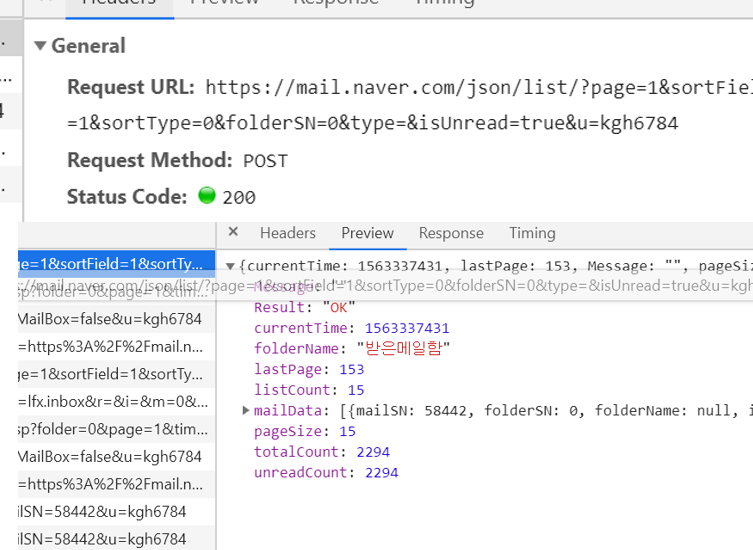

In [117]:
# post 방식
html = session.post("https://mail.naver.com/json/list/?page=1&sortField=1&sortType=0&folderSN=0&type=&isUnread=true&u=kgh6784")
html.json()

{'currentTime': 1563337575,
 'lastPage': 153,
 'Message': '',
 'pageSize': 15,
 'unreadCount': 2294,
 'mailData': [{'mailSN': 58442,
   'folderSN': 0,
   'folderName': None,
   'iconType': 0,
   'status': 2097152,
   'from': {'name': '다이렉트자동차보험센터', 'email': 'info@theappl.com'},
   'subject': '(광고) 내 차보험료 블랙박스, 마일리지, 무사고, 제휴카드 할인으로 보험료비교.',
   'receivedTime': 1563333322,
   'sentTime': 1563328805,
   'size': 6473,
   'attachCount': 0,
   'iDomainEmail': 'kgh6784@naver.com',
   'priority': 3,
   'securityLevel': None,
   'reSend': False,
   'color': '#ffffff',
   'preview': '',
   'mimeSN': '1563333322.928163.2827.9984',
   'toList': [{'name': '', 'email': 'kgh6784@naver.com'}],
   'spamType': None,
   'attachInfo': [],
   'threadId': '<1598750918.187649.1563333322902@[218.145.69.114]>',
   'bccList': [],
   'receiveByBcc': False,
   'threadCount': 0,
   'unreadThreadCount': 0,
   'firstLocatedTime': 1563333322,
   'remindAt': 0,
   'threadRemindAt': 0,
   'threadRemindFlag': 0,
   'cate

In [118]:
for _ in html.json()["mailData"]:
    print(_["subject"])

(광고) 내 차보험료 블랙박스, 마일리지, 무사고, 제휴카드 할인으로 보험료비교.
[와디즈] 눈건강프로젝트 프로젝트 새소식 : ★와디즈 서포터즈 감사제★ 단 3일, 닥터메이트 특가 할인 이벤트
(광고) 오늘의 최신 토익RC문제 무료학습 ▶
(광고) 자나 깨나, 그대를 즐겁게 할 공연 생각!
(광고) 내 의료실비 보험료 7월에 가입하면 얼마일까? 즉시확인!
(광고) 7월에 갈만한 곳, 29CM 컬처캘린더
(광고) 8/6일 Lenovo Transform 3.0에서 세계 최고 로봇공학자 데니스 홍을 만나보세요.
(광고) kgh6784@naver.com님이 차 바꾸고 싶을때!!! 보증금 ZERO 신차 장기렌트가 무료견적 받아보세요~
(광고) 전자노트 12인치 2+1증정, 최저가 / 모나미 153 만년필+펜파우치 SET 2만원 최저가 / 손안대고 발닦는 풋브러쉬 9,800원
(광고) 명품 직구 슈퍼위크, 감정 서비스 런칭! 
[한국경제신문 오늘의 뉴스] ‘强대强’ 치닫는 韓·日…기업들은 속 탄다 外
(광고) 유전자검사 검사비 무료 + 보험보장 설계 혜택 받으세요! ▶ 즉시신청
We found a paper that you might be interested in.
인생의 복기
(광고) ★어메이징10days★ 최대10% 카드할인+10만점+5% 적립


In [119]:
# 글자깨지는거방지 (unescape)
from html import unescape
html = session.post("https://mail.naver.com/json/list/?page=1&sortField=1&sortType=0&folderSN=0&type=&isUnread=true&u=kgh6784")

for _ in html.json()["mailData"]:
    print(unescape(_["subject"]))

(광고) 내 차보험료 블랙박스, 마일리지, 무사고, 제휴카드 할인으로 보험료비교.
[와디즈] 눈건강프로젝트 프로젝트 새소식 : ★와디즈 서포터즈 감사제★ 단 3일, 닥터메이트 특가 할인 이벤트
(광고) 오늘의 최신 토익RC문제 무료학습 ▶
(광고) 자나 깨나, 그대를 즐겁게 할 공연 생각!
(광고) 내 의료실비 보험료 7월에 가입하면 얼마일까? 즉시확인!
(광고) 7월에 갈만한 곳, 29CM 컬처캘린더
(광고) 8/6일 Lenovo Transform 3.0에서 세계 최고 로봇공학자 데니스 홍을 만나보세요.
(광고) kgh6784@naver.com님이 차 바꾸고 싶을때!!! 보증금 ZERO 신차 장기렌트가 무료견적 받아보세요~
(광고) 전자노트 12인치 2+1증정, 최저가 / 모나미 153 만년필+펜파우치 SET 2만원 최저가 / 손안대고 발닦는 풋브러쉬 9,800원
(광고) 명품 직구 슈퍼위크, 감정 서비스 런칭! 
[한국경제신문 오늘의 뉴스] ‘强대强’ 치닫는 韓·日…기업들은 속 탄다 外
(광고) 유전자검사 검사비 무료 + 보험보장 설계 혜택 받으세요! ▶ 즉시신청
We found a paper that you might be interested in.
인생의 복기
(광고) ★어메이징10days★ 최대10% 카드할인+10만점+5% 적립


In [120]:
html = requests.post("https://mail.naver.com/json/list/?page=1&sortField=1&sortType=0&folderSN=0&type=&isUnread=true&u=kgh6784")
html.text

'{"Result":"FAIL","Message":"", "LoginStatus":"NOLOGIN"}'

-> 쿠키 값 없으므로 request는 fail

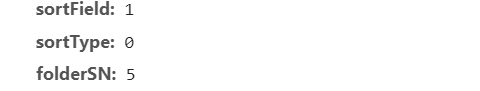

- 받은 메일함과 스펨메일함의 차이는 folderSN이므로 이거만 조정하면 된다

In [142]:
html = session.get("https://section.cafe.naver.com/cafe-home-api/v1/homepc?myCafeCount=10&articleCount=3&useMyCafeEvent=true")

for _ in html.json()["message"]["result"]["myCafe"]["cafes"]:
    print(_["cafeName"])


인공지능연구소
한국대학생IT경영학회
독취사-취업,대학생,대기업,공기업,NCS,인턴,공모전,승무원,토익
[아웃캠퍼스] 대학생 공모전 대외활동 해외봉사 인턴 취업
취업대학교#공기업,인턴,NCS,승무원,알바이력서,자기소개서,토익
LG디스플레이 영채널 소셜크리에이터 카페
위데이터랩
'SIU' - [팬 카페♡] 신의 탑 영원하라!
포만한 수학 연구소
KUBERA [네이버 웹툰 쿠베라 팬카페]


In [174]:
html = session.get("https://section.cafe.naver.com/cafe-home-api/v1/homepc?myCafeCount=10&articleCount=3&useMyCafeEvent=true")


In [146]:
for _ in driver.find_elements_by_xpath("\
//div[@class='user_mycafe_list']\
//div[@class='user_mycafe_info']/a/strong[@class='name']"):
    print(_.text)

##다시
BeautifulSoup
#### 원하는 정보가 있는 위치 찾기 

- soup.select('원하는 정보')  # select('원하는 정보') -->  단 하나만 있더라도, 복수 가능한 형태로 되어있음
- soup.select('태그명')
- soup.select('.클래스명')
- soup.select('상위태그명 > 하위태그명 > 하위태그명')
- soup.select('상위태그명.클래스명 > 하위태그명.클래스명')    # 바로 아래의(자식) 태그를 선택시에는 > 기호를 사용
- soup.select('상위태그명.클래스명 하~위태그명')              # 아래의(자손) 태그를 선택시에는   띄어쓰기 사용
- soup.select('상위태그명 > 바로아래태그명 하~위태그명')     
- soup.select('.클래스명')
- soup.select('#아이디명')                  # 태그는 여러개에 사용 가능하나 아이디는 한번만 사용 가능함! ==> 선택하기 좋음
- soup.select('태그명.클래스명)
- soup.select('#아이디명 > 태그명.클래스명)
- soup.select('태그명[속성1=값1]')


In [149]:
driver.find_element_by_css_selector('.name')

<selenium.webdriver.remote.webelement.WebElement (session="6bde599bd789e38ccf1d1e405e52010c", element="e72230dc-2632-4b73-8ef5-24c5b090a1db")>

In [151]:
driver.find_elements_by_css_selector('.user_mycafe_box')

[]

In [175]:
for _ in driver.find_elements_by_css_selector('.user_mycafe_box'):
    print(_.text)

In [176]:
# 로그아웃

In [180]:
driver.find_element_by_css_selector("#gnb_name2 + a.gnb_btn_login").click()

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"#gnb_name2 + a.gnb_btn_login"}
  (Session info: chrome=75.0.3770.142)


In [179]:
dom = BeautifulSoup(driver.page_source, "lxml")
dom.select("#gnb_name2 + a.gnb_btn_login")

[]

- dom에 있는데 로그아웃이 안된다. 정상이다
- 이 창을 실행시켜놓으면 안된다
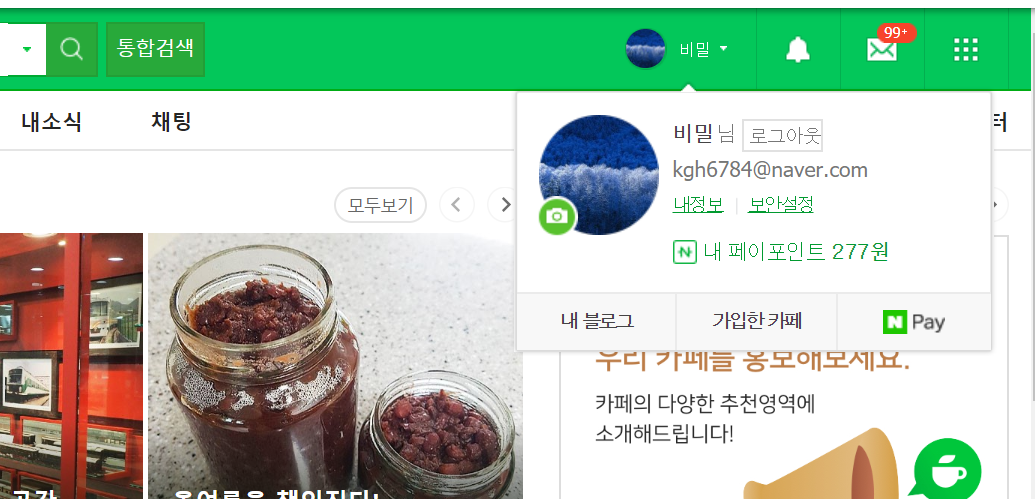

In [193]:
# 봇을 만들자 
import sqlite3
con = sqlite3.connect("wha.db") 
cur = con.cursor()

In [220]:
cur.executescript("""
    DROP TABLE IF EXISTS table1;    
    CREATE TABLE table1(
        id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
        title TEXT NOT NULL,
        url TEXT NOT NULL
    );  
    
    
    DROP TABLE IF EXISTS table2;    
    CREATE TABLE table2(
        id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
        table1_id TEXT NOT NULL,
        content TEXT NOT NULL
    );    
    
""")
con.commit()


In [224]:
driver.get("https://news.naver.com")

In [226]:
for _ in driver.find_elements_by_css_selector(
    ".hdline_news .hdline_article_fit > a, \
    .com_list li > a"):
    if len(_.get_attrubute("href")) > 1:
        cur.execute("INSERT INTO table1(title, url) \
        VALUES(?, ?)", [_.TEXT, _.get_attribute("href")])
        con.commit()

AttributeError: 'WebElement' object has no attribute 'get_attrubute'

In [218]:
[_.get_attribute("href") for _ in driver.find_elements_by_css_selector(".hdline_article_tit")]

[None, None, None, None, None, None]

In [263]:
driver.get("https://nid.naver.com/nidlogin.login?mode=form&url=https%3A%2F%2Fwww.naver.com")

In [264]:
#driver.implicitly_wait()
driver.find_element_by_css_selector("#gnb_name2 + a.gnb_btn_login").click()

ElementNotInteractableException: Message: element not interactable
  (Session info: chrome=75.0.3770.142)


In [252]:
from selenium.webdriver.support.ui import WebDriverWait

In [253]:
from selenium.common.exceptions import NoSuchElementException

In [254]:
from selenium.common.exceptions import ElementNotVisibleException
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC

In [265]:
wait = WebDriverWait(driver, 10, 0.5, 
                     [NoSuchElementException])

In [266]:
wait.until(EC.visibility_of_element_located(
    (By.CSS_SELECTOR, "#gnb_name2 + a.gnb_btn_login")))

driver.find_element_by_css_selector("#gnb_name2 + a.gnb_btn_login").click()

In [274]:
wait = WebDriverWait(driver, 10, 0.5, [ElementNotVisibleException])

wait.until(
lambda x:x.find_element_by_css_selector(
    "#gnb_name2+a.gnb_btn_login").is_displayed())

logout = driver.find_element_by_css_selector("#gnb_name2 + a.gnb_btn_login").click()

TimeoutException: Message: 


In [289]:
logout = driver.find_element_by_css_selector("#gnb_name2 + a.gnb_btn_login")

In [291]:
logout.is_displayed()

True

In [299]:
driver.get("https://www.naver.com")

In [300]:
iframe = driver.find_element_by_name("da_iframe_time")
driver.switch_to_frame(iframe)

C:\Users\kgh67\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: use driver.switch_to.frame instead
  


In [301]:
driver.find_element_by_tag_name("img").get_attribute("src")
driver.switch_to_default_content()

C:\Users\kgh67\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: use driver.switch_to.default_content instead
  


In [302]:
driver.window_handles

['CDwindow-081ADEB94DE8646A00F5EC32DE51EAEB']

In [303]:
driver.switch_to_window("CDwindow-081ADEB94DE8646A00F5EC32DE51EAEB")

C:\Users\kgh67\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: use driver.switch_to.window instead
  """Entry point for launching an IPython kernel.


## kt

In [304]:
driver.get("https://www.kt.com")

In [305]:
driver.find_element_by_css_selector("span.quick > a").click()

In [306]:
driver.switch_to_window(driver.window_handles[-1])

C:\Users\kgh67\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: use driver.switch_to.window instead
  """Entry point for launching an IPython kernel.


In [308]:
driver.find_element_by_id("userId").send_keys("test")

In [309]:
driver.window_handles

['CDwindow-081ADEB94DE8646A00F5EC32DE51EAEB',
 'CDwindow-EA967F4F347BF6228247F356AF9D8224',
 'CDwindow-A73EF7832DA5B48ED4893ADBB65721B1']

In [310]:
driver.close()

In [312]:
driver.window_handles

['CDwindow-081ADEB94DE8646A00F5EC32DE51EAEB']

In [313]:
driver.switch_to_window(driver.window_handles[0])

C:\Users\kgh67\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: use driver.switch_to.window instead
  """Entry point for launching an IPython kernel.


In [315]:
driver.find_element_by_css_selector("span.quick > a").click()

In [317]:
driver.window_handles

['CDwindow-081ADEB94DE8646A00F5EC32DE51EAEB',
 'CDwindow-B496F723715FDB3104ECA218D5442C80']

In [318]:
from selenium.webdriver.common.keys import Keys

In [319]:
Keys.CONTROL + "t" # 새 탭
Keys.CONTROL + "n" # 새 창

'\ue009n'

In [325]:
driver.execute_script("javascript:window.open('about:blank');") # 새 탭

In [ ]:
driver.switch_to_window(driver.window_handles[0])

In [327]:
driver.switch_to_window(driver.window_handles[1])
driver.get("http://www.naver.com")
driver.switch_to_window(driver.window_handles[0])

IndexError: list index out of range

In [ ]:
driver.switch_to_window(driver.window_handles[0])

In [ ]:
wait = WebDriverWait(driver, 10, 0.5, 
                     [NoSuchElementException])
for news in 
